# Implementing AdaBoost Classifier from scratch
### Álvaro Corrales Cano
### April 2021 - work in progress

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from AdaBoost import *
from sklearn.ensemble import AdaBoostClassifier


## Synthetic dataset


In [2]:
# Generate classification dataset
X, y = make_classification(n_samples= 1000, n_features = 20, random_state = 42)
y = y * 2 - 1       # Original AdaBoost uses {1, -1} as class labels

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Custom implementation

In [3]:
# Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.8621


### Scikit-Learn implementation of AdaBoost

In [4]:
ab_sk = AdaBoostClassifier(n_estimators = 400) # Same boosting rounds (M) as in our model
ab_sk.fit(X_train, y_train)
y_pred_sk = ab_sk.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred_sk), 4))

The ROC-AUC score of the model is: 0.8427


Our custom model has a ROC-AUC score that's comparable to the Scikit-Learn implementation of AdaBoost. The Scikit-Learn implementation uses a different boosting algorithm, so our results are not exactly the same.

## Real dataset

Dataset containing 4601 emails that are labeled as either spam or not. Features are mostly word and symbol frequencies. The data is publicly available at the University of California, Irvine's Machine Learning repository and was donated by George Forman from HP Laboratories. It can be downloaded in this [link](http://archive.ics.uci.edu/ml/datasets/Spambase).

# Dataset
df = pd.read_csv('./spambase/spambase.data', header = None)

# Column names
names = pd.read_csv('./spambase/spambase.names', sep = ':', skiprows=range(0, 33), header = None)
col_names = list(names[0])
col_names.append('Spam')

# Rename df columns
df.columns = col_names

# Convert classes in target variable to {-1, 1}
df['Spam'] = df['Spam'] * 2 - 1

print('Shape of data:', df.shape)
df.tail()

In [20]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Spam').values, df['Spam'].values, train_size = 3065, random_state = 2) # Same size as 9.1.2 in The Elements of Statistical Learning, though probably not same samples

In [5]:
### Custom implementation

Shape of data: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,-1
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,-1
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,-1
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,-1
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,-1


In [21]:
# Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.9399


### Scikit-Learn implementation of AdaBoost

In [22]:
ab_sk = AdaBoostClassifier(n_estimators = 400) # Same boosting rounds (M) as in our model
ab_sk.fit(X_train, y_train)
y_pred_sk = ab_sk.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred_sk), 4))

The ROC-AUC score of the model is: 0.9279


### Explanatory plots of custom implementation

Let's see what's happening "under the hood". AdaBoost fits a bunch of weak classifiers to generate a voting comittee that yields a robust overall metaclassifier.

Our AdaBoost implementation fits very simple decision trees that consist of just two terminal nodes. These are called "stumps". The plots below show the error (misclassification) rates of each stump during training and out of sample. As we can see in the first plot, most are just better than random guessing during training, with an error rate slightly below 0.5. 

This doesn't guarantee that they will perform at least as well out of sample. In fact, the second plot shows that a significant proportion of stumps misclassifies most of the times. However, that also shows the beauty of AdaBoost: even if the stumps are really bad by themselves, their combined (weighted) predictions got a ROC-AUC score above 94% and an error rate of 5.6%! 

By comparison, The Elements of Statistical Learning, in chapter 10.8 get an error rate of 4.5% using gradient boosting, 5.5% using additive logistic regression, 8.7% with a CART tree and 5.5% using MARS. Note that we are not using the same sample exactly, only the same number of observations.

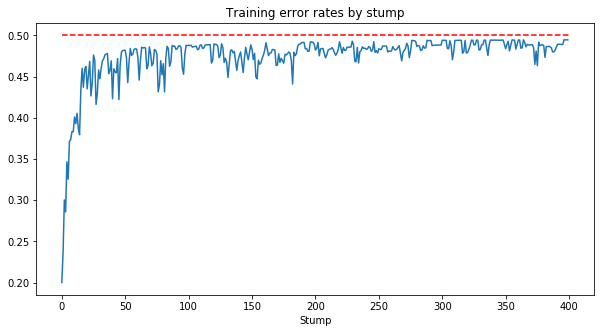

In [23]:
# Error rates during training
plt.figure(figsize=(10,5))
plt.plot(ab.training_errors)
plt.hlines(0.5, 0, 400, colors = 'red', linestyles='dashed')
plt.title('Training error rates by stump')
plt.xlabel('Stump')
plt.show()

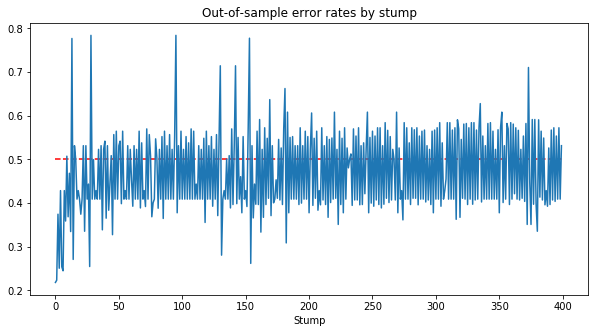

In [24]:
# Error rates out of sample
ab.error_rates(X_test, y_test)
plt.figure(figsize=(10,5))
plt.plot(ab.prediction_errors)
plt.hlines(0.5, 0, 400, colors = 'red', linestyles='dashed')
plt.title('Out-of-sample error rates by stump')
plt.xlabel('Stump')
plt.show()

In [27]:
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation

    
    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

print('Error rate of metaclassifier:', round(compute_error(y_test, y_pred, np.ones(len(y_test))), 4))

Error rate of metaclassifier: 0.056
